In [22]:
%matplotlib inline
import xarray as xr
import intake
import cftime

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col.df.columns



Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [23]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [46]:
cat_HistConc = col.search(source_id='CESM2', experiment_id=['historical'], table_id='SImon', variable_id='siconc', grid_label='gn')
HistConc_dset = cat_HistConc.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}})
#HistConc1_dset.keys()

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [47]:
cat_AreaCell = col.search(source_id='CESM2', experiment_id=['historical'], table_id='Ofx', variable_id='areacello', grid_label='gn')
AreaCell_dset = cat_AreaCell.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [50]:
AreaCell_dset

{'CMIP.NCAR.CESM2.historical.Ofx.gn': <xarray.Dataset>
 Dimensions:    (member_id: 11, nlat: 384, nlon: 320, vertices: 4)
 Coordinates:
   * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
   * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
   * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
 Dimensions without coordinates: vertices
 Data variables:
     lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
     lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
     areacello  (member_id, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
 Attributes:
     tracking_id:            hdl:21.14100/57544725-facb-4d30-90b0-8855724

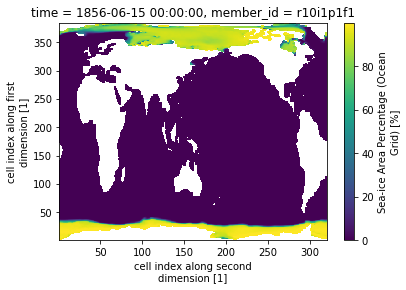

In [49]:

for key, ds in HistConc_dset.items():
    t=cftime.DatetimeNoLeap(2015,1,15,12,0,0,0,6,15)
    ds.siconc[0,77,:,:].plot()
    #ds.siconc.sel(time=t).plot()
    

In [51]:
ds.siconc[0,77,:,:].sum()

<xarray.DataArray 'siconc' ()>
dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time       object 1856-06-15 00:00:00
    member_id  <U9 'r10i1p1f1'

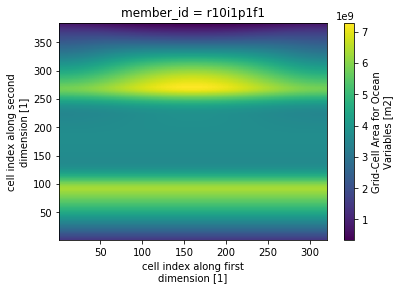

In [53]:
for key, ac in AreaCell_dset.items():
    t=cftime.DatetimeNoLeap(2015,1,15,12,0,0,0,6,15)
    ac.areacello[0,:,:].plot()

In [59]:
ac.areacello[0,:,:].where(ds.siconc[0,77,:,:]>15).sum()

<xarray.DataArray 'areacello' ()>
dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U9 'r10i1p1f1'
    time       object 1856-06-15 00:00:00

In [64]:
ac.areacello.where(ac.areacello>5e9)

<xarray.DataArray 'areacello' (member_id: 11, nlat: 384, nlon: 320)>
dask.array<where, shape=(11, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
Attributes:
    cell_methods:   area: sum
    description:    Cell areas for any grid used to report ocean variables an...
    frequency:      fx
    id:             areacello
    long_name:      Grid-Cell Area for Ocean Variables
    mipTable:       Ofx
    out_name:       areacello
    prov:           Ofx ((isd.003))
    realm:          ocean
    standard_name:  cell_area
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Ocean Variables
    type:           real
    units:          m2
    vari